In [1]:
from scipy.io import arff
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import davies_bouldin_score
from mpl_toolkits.mplot3d import *
from random import random, seed
from matplotlib import cm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [2]:
df = pd.read_csv('new_data2.csv')

In [3]:
df.head()

,user_name,daily_profit,daily_income,expenses,coeff,p_value
0,00415952-3309-4e6b-af4b-b1c02dc2d08b+Sales,82.057523,6220.606970,6138.549447,-0.731327,0.851442
1,009f7f82-f9be-470a-8df0-1e2043829cd5+Coffee Sales,9.651116,16712.679583,16703.028467,-20.082338,0.069878
2,009f7f82-f9be-470a-8df0-1e2043829cd5+Food Sales,7.909785,17785.715417,17777.805631,-26.526618,0.098223
3,009f7f82-f9be-470a-8df0-1e2043829cd5+Other Income,52.159368,4478.290000,4426.130632,4.053917,0.270635
4,009f7f82-f9be-470a-8df0-1e2043829cd5+Soft Beve...,0.963863,3245.362083,3244.398221,-3.725343,0.197756


In [4]:
df.shape

(2892, 6)

In [5]:
import pandas as pd
import numpy as np

rs = np.random.RandomState(0)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,daily_profit,daily_income,expenses,coeff,p_value
daily_profit,1,0.637972,0.629836,-0.186387,-0.00747527
daily_income,0.637972,1,0.999945,-0.212663,-0.0684389
expenses,0.629836,0.999945,1,-0.211958,-0.0689295
coeff,-0.186387,-0.212663,-0.211958,1,0.0438402
p_value,-0.00747527,-0.0684389,-0.0689295,0.0438402,1


In [6]:
df = df.drop(["expenses"], axis=1)

In [7]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,daily_profit,daily_income,coeff,p_value
daily_profit,1,0.637972,-0.186387,-0.00747527
daily_income,0.637972,1,-0.212663,-0.0684389
coeff,-0.186387,-0.212663,1,0.0438402
p_value,-0.00747527,-0.0684389,0.0438402,1


In [8]:
df = df.drop(["user_name", "p_value"], axis =1)

In [9]:
df.head()

,daily_profit,daily_income,coeff
0,82.057523,6220.606970,-0.731327
1,9.651116,16712.679583,-20.082338
2,7.909785,17785.715417,-26.526618
3,52.159368,4478.290000,4.053917
4,0.963863,3245.362083,-3.725343


In [10]:
np.any(np.isnan(df))

False

In [11]:
sd = StandardScaler()
sd1 = RobustScaler()
df = sd.fit_transform(df)
df = sd1.fit_transform(df)

In [12]:
print(df)

[[ 0.38677674  0.14129958  0.03074046]
 [-0.05628348  0.72223468 -0.99997812]
 [-0.06693882  0.78164755 -1.34322838]
 ...
 [ 0.6717912   2.3362559  -7.99346602]
 [ 9.56444714  5.4053932   3.05642492]
 [ 0.10392624  0.36069043 -1.15133155]]


In [13]:
df = pd.DataFrame(df)

In [14]:
df.head()

,0,1,2
0,0.386777,0.141300,0.030740
1,-0.056283,0.722235,-0.999978
2,-0.066939,0.781648,-1.343228
3,0.203828,0.044829,0.285623
4,-0.109441,-0.023437,-0.128734


In [15]:
df.columns = ['new_profit','new_income', 'coeff']

In [16]:
df.shape

(2892, 3)

In [17]:
indexNames = df[ df['coeff'] == min(df['coeff']) ].index
df.drop(indexNames, inplace = True)
indexNames = df[ df['coeff'] == min(df['coeff']) ].index
df.drop(indexNames, inplace = True)

<IPython.core.display.Javascript object>


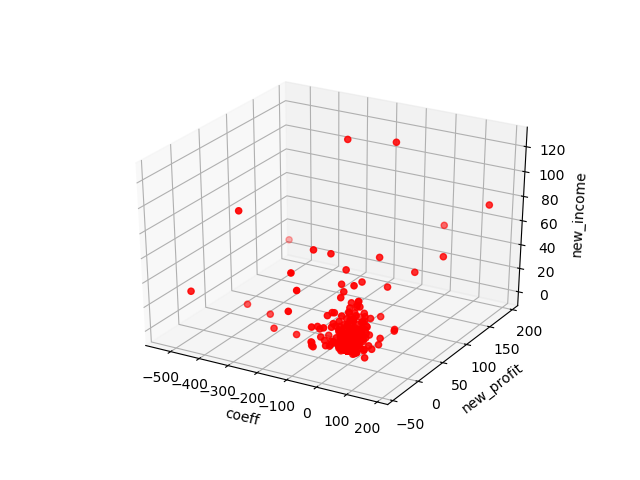

In [18]:
%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#x = np.log2(df["income"])
#z = np.log2(df["profit"])
x = df["coeff"]
y = df["new_profit"]
z = df["new_income"]
ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('coeff')
ax.set_ylabel('new_profit')
ax.set_zlabel('new_income')

plt.show()

In [19]:
kmeans_model = KMeans(n_clusters=4, random_state=1).fit(df)
labels = kmeans_model.predict(df)

In [20]:
k_means = labels

<IPython.core.display.Javascript object>


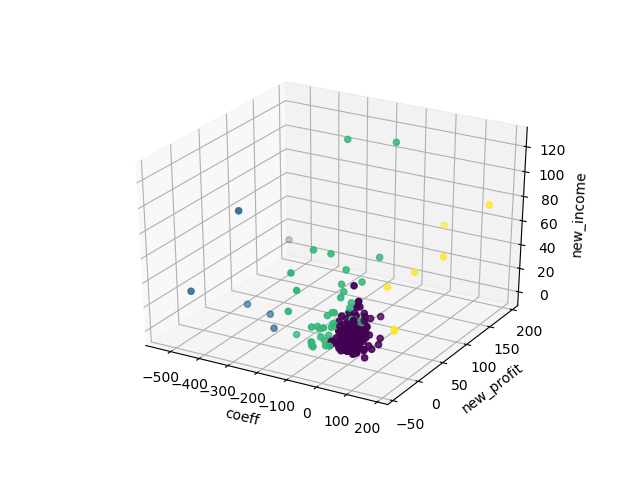

In [21]:
fig = plt.figure()
ax = fig.gca(projection='3d')               # to work in 3d


x = df["coeff"]
y = df["new_profit"] # (closing balanced at account - starting balanced at account) / total number of days
z = df["new_income"] # mean of the daily income / total number of days
ax.scatter(x, y, z, c=labels, marker='o')

ax.set_xlabel('coeff')
ax.set_ylabel('new_profit')
ax.set_zlabel('new_income')

plt.show()

In [22]:
X = df.values
print(metrics.silhouette_score(X, labels, metric='euclidean'))
print(davies_bouldin_score(X, labels))

0.9218178103110622
0.6416804154033725


C:\Users\yaoxinyu\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


In [23]:
dbscan = DBSCAN(eps=4,min_samples=10)
clusters = dbscan.fit_predict(df)

In [24]:
dbscan = clusters

<IPython.core.display.Javascript object>


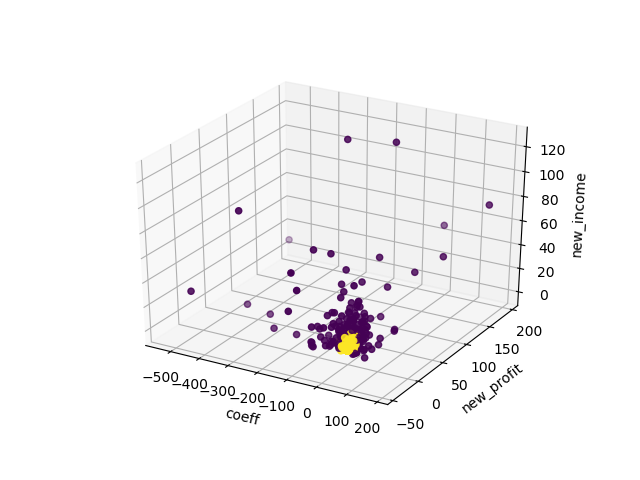

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#x = np.log2(df["income"])
#z = np.log2(df["profit"])
x = df["coeff"]
y = df["new_profit"]
z = df["new_income"]
ax.scatter(x, y, z, c=clusters, marker='o')

ax.set_xlabel('coeff')
ax.set_ylabel('new_profit')
ax.set_zlabel('new_income')

plt.show()

In [26]:
X = df.values
print(metrics.silhouette_score(X, clusters, metric='euclidean'))
print(davies_bouldin_score(X, clusters))

0.859816830692612
1.5242659479750873


C:\Users\yaoxinyu\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


In [27]:
clusters2 = AgglomerativeClustering(n_clusters=4).fit_predict(df)

<IPython.core.display.Javascript object>


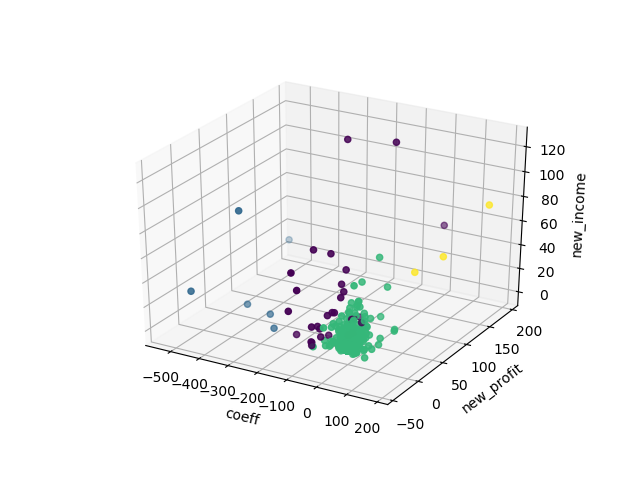

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#x = np.log2(df["income"])
#z = np.log2(df["profit"])
x = df["coeff"]
y = df["new_profit"]
z = df["new_income"]
ax.scatter(x, y, z, c=clusters2, marker='o')

ax.set_xlabel('coeff')
ax.set_ylabel('new_profit')
ax.set_zlabel('new_income')
plt.show()

In [29]:
agg=clusters2

In [30]:
X = df.values
print(metrics.silhouette_score(X, clusters2, metric='euclidean'))
print(davies_bouldin_score(X, clusters2))

0.9315758760323617
0.5900853688281789


C:\Users\yaoxinyu\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


In [31]:
from sklearn.cluster import MiniBatchKMeans
MBK = MiniBatchKMeans(n_clusters=3, random_state=0, batch_size=20, max_iter=10).fit(df)
cluster3 = MBK.predict(df)

<IPython.core.display.Javascript object>


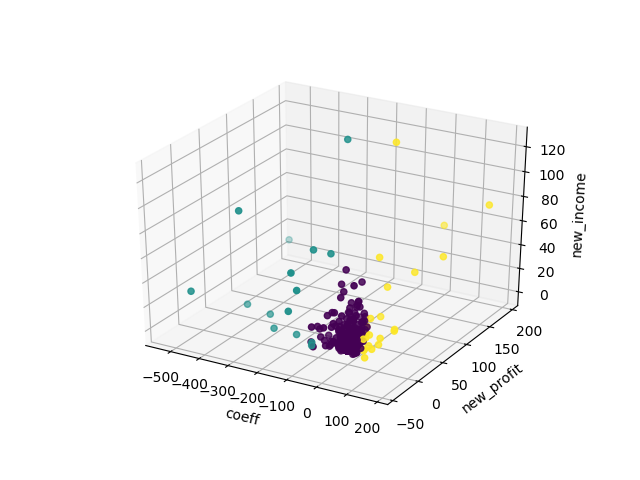

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = df["coeff"]
y = df["new_profit"]
z = df["new_income"]
ax.scatter(x, y, z, c=cluster3, marker='o')

ax.set_xlabel('coeff')
ax.set_ylabel('new_profit')
ax.set_zlabel('new_income')

plt.show()

In [33]:
minbatch = cluster3

In [34]:
X = df.values
print(metrics.silhouette_score(X, cluster3, metric='euclidean'))
print(davies_bouldin_score(X, cluster3))

0.9144837165292399
0.8774144552459822


C:\Users\yaoxinyu\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


In [35]:
df1 = pd.read_csv('new_data1.csv')

In [36]:
df1.shape

(3148, 6)

In [37]:
df1.tail()

,user_name,daily_profit,daily_income,expenses,coeff,p_value
3143,ff3c64e2-35f7-4b94-86ca-39c73eb48e73+Rent rece...,2.736093,2074.821429,2072.085335,-1.435414,0.004812
3144,ff436d63-450a-4f45-925f-c908554883bd+Interest ...,-0.005940,0.644545,0.650486,-0.003159,0.190206
3145,ff436d63-450a-4f45-925f-c908554883bd+NZ Sales NZD,-361.821761,40349.237273,40711.059034,-136.793819,0.008523
3146,ff436d63-450a-4f45-925f-c908554883bd+Overseas ...,1689.514672,97154.689091,95465.174419,0.152073,0.997909
3147,ff436d63-450a-4f45-925f-c908554883bd+Petty Cas...,51.610466,10186.887500,10135.277034,-19.590324,0.108442


In [38]:
result = pd.concat([df1, pd.DataFrame(k_means), pd.DataFrame(agg), pd.DataFrame(minbatch)], axis=1, sort=False)

In [39]:
result.tail(10)

,user_name,daily_profit,daily_income,expenses,coeff,p_value,0,0,0
3138,ff3c64e2-35f7-4b94-86ca-39c73eb48e73+Rent Rece...,7.191011,2095.806452,2088.615440,-1.810793,0.001427,NaN,NaN,NaN
3139,ff3c64e2-35f7-4b94-86ca-39c73eb48e73+Rent Rece...,3.945069,1600.967742,1597.022673,-1.635239,0.000098,NaN,NaN,NaN
3140,ff3c64e2-35f7-4b94-86ca-39c73eb48e73+Rent Rece...,10.955000,2377.746000,2366.791000,0.395760,0.612955,NaN,NaN,NaN
3141,ff3c64e2-35f7-4b94-86ca-39c73eb48e73+Rent Rece...,5.411985,1642.741935,1637.329950,-1.431399,0.000212,NaN,NaN,NaN
3142,ff3c64e2-35f7-4b94-86ca-39c73eb48e73+Rent Rece...,37.680921,2144.285714,2106.604793,2.451488,0.754950,NaN,NaN,NaN
3143,ff3c64e2-35f7-4b94-86ca-39c73eb48e73+Rent rece...,2.736093,2074.821429,2072.085335,-1.435414,0.004812,NaN,NaN,NaN
3144,ff436d63-450a-4f45-925f-c908554883bd+Interest ...,-0.005940,0.644545,0.650486,-0.003159,0.190206,NaN,NaN,NaN
3145,ff436d63-450a-4f45-925f-c908554883bd+NZ Sales NZD,-361.821761,40349.237273,40711.059034,-136.793819,0.008523,NaN,NaN,NaN
3146,ff436d63-450a-4f45-925f-c908554883bd+Overseas ...,1689.514672,97154.689091,95465.174419,0.152073,0.997909,NaN,NaN,NaN
3147,ff436d63-450a-4f45-925f-c908554883bd+Petty Cas...,51.610466,10186.887500,10135.277034,-19.590324,0.108442,NaN,NaN,NaN


In [40]:
result.shape

(3148, 9)

In [41]:
result.columns = ['company_id', 'daily_profit', "daily_income", "daily_outcome", "coeff", "p_value", "K_means", "Agglomerative", "Min_Batch"]

In [42]:
import collections
counter=collections.Counter(k_means)
print(counter)

Counter({0: 2834, 2: 43, 3: 7, 1: 6})


In [43]:
counter=collections.Counter(agg)
print(counter)

Counter({2: 2851, 0: 30, 1: 6, 3: 3})


In [44]:
counter=collections.Counter(minbatch)
print(counter)

Counter({0: 2852, 2: 23, 1: 15})


In [45]:
result.loc[(result['Agglomerative'] == 0)]

,company_id,daily_profit,daily_income,daily_outcome,coeff,p_value,K_means,Agglomerative,Min_Batch
15,02246f3d-262e-4fa6-9db6-b98df684b210+Sales,5136.058455,747918.426389,742782.367934,-1.424313e+03,0.002011,2.0,0.0,0.0
70,0889e065-65c1-4867-8d21-7471436b255f+DPS-BOS P...,-99.556686,2887.993684,2987.550370,-2.566627e+01,0.472040,2.0,0.0,0.0
347,21851a95-5e76-4efd-b322-1d4a04e5f308+Interest ...,0.000777,0.090400,0.089623,2.860258e-04,0.008993,2.0,0.0,0.0
418,2a7fbb4d-fc2b-4864-9579-c00381ce8b2f+Travel re...,-0.094262,365.371333,365.465596,-1.149488e+00,0.024732,2.0,0.0,0.0
436,2b3ae0a5-ce4b-4266-b8c5-d94b855fcbe1+Fidelity ...,23.436939,13322.249706,13298.812767,-2.342185e+01,0.000010,2.0,0.0,0.0
487,2fcfce14-d14c-4a97-b862-e82256416ef0+Hot Water...,-1.460082,4684.022000,4685.482082,8.116877e-01,0.890877,2.0,0.0,0.0
565,36fa7c7a-b9b3-4346-810a-3d03432c4862+Miscellan...,0.697834,39.500000,38.802166,4.816675e-02,0.139491,2.0,0.0,2.0
597,38bb02d4-7e19-4e72-924c-d24d333ece18+Sales - P...,90.673086,2633.479286,2542.806199,-1.332914e+00,0.928945,2.0,0.0,0.0
676,3eec52f5-91ee-4e7d-a667-e172a8929d6b+Sales - A...,58.823529,3000.000000,2941.176471,-5.219642e-15,0.109409,2.0,0.0,1.0
783,45729723-873d-42a7-9dca-b5ac90a453fc+Kitchen /...,-3.824058,1175.983500,1179.807558,-2.918070e+00,0.168889,2.0,0.0,1.0


In [46]:
result.loc[(result['Agglomerative'] == 3)]

,company_id,daily_profit,daily_income,daily_outcome,coeff,p_value,K_means,Agglomerative,Min_Batch
431,2b3ae0a5-ce4b-4266-b8c5-d94b855fcbe1+AIA,6.654081,7608.000400,7601.346319,-5.164520,0.535963,3.0,3.0,2.0
648,3cc9f3e8-9d71-4e0a-94dd-a4090afba37c+Revenue -...,322.063492,45135.000000,44812.936508,-8.593114,0.560959,3.0,3.0,2.0
1513,842fd483-61a3-436d-8eb9-e6c826e3c081+Sales - S...,650.360909,39815.613846,39165.252937,67.029162,0.031337,3.0,3.0,2.0


In [47]:
result.loc[(result['Agglomerative'] == 1)]

,company_id,daily_profit,daily_income,daily_outcome,coeff,p_value,K_means,Agglomerative,Min_Batch
929,4f239bf3-7d65-4db0-91c1-e86a26f7cd1b+Rent - St...,15.852880,5929.002857,5913.149978,-2.234208,0.291901,1.0,1.0,1.0
937,4fa7a766-05fb-4afc-9ed3-dffe3f82e862+Professio...,48.223505,13744.846410,13696.622905,-31.564527,0.000015,1.0,1.0,1.0
1115,64090e9e-2114-4428-98da-30c6951434d5+Swimming,4.616357,319.682000,315.065643,0.393798,0.435034,1.0,1.0,1.0
2302,b9bd90e0-d538-4598-804b-490541017eb6+Commissio...,194.826699,6164.681000,5969.854301,4.236186,0.826457,1.0,1.0,1.0
2556,cb4e5219-086c-4f10-8ad7-f285b5e3275c+Sales - O...,12.311683,946.773684,934.462001,-1.500803,0.000169,1.0,1.0,1.0
2612,d03e84e2-9f15-4958-a663-825bb9008c19+Device Sa...,-1.267051,2495.488571,2496.755622,0.298191,0.987610,1.0,1.0,1.0


In [48]:
result.loc[(result['Agglomerative'] == 2)]

,company_id,daily_profit,daily_income,daily_outcome,coeff,p_value,K_means,Agglomerative,Min_Batch
0,00415952-3309-4e6b-af4b-b1c02dc2d08b+Sales,82.057523,6220.606970,6138.549447,-0.731327,8.514418e-01,0.0,2.0,0.0
1,009f7f82-f9be-470a-8df0-1e2043829cd5+Coffee Sales,18.768728,16376.428000,16357.659272,-19.845017,4.730355e-02,0.0,2.0,0.0
2,009f7f82-f9be-470a-8df0-1e2043829cd5+Food Sales,19.840337,17489.607200,17469.766863,-24.935850,8.433158e-02,0.0,2.0,0.0
3,009f7f82-f9be-470a-8df0-1e2043829cd5+Other Income,55.199238,4383.180000,4327.980762,3.283642,3.388806e-01,0.0,2.0,0.0
4,009f7f82-f9be-470a-8df0-1e2043829cd5+Soft Beve...,3.429364,3198.612000,3195.182636,-3.546503,1.729202e-01,0.0,2.0,0.0
5,00c0d1bb-f1fa-4b19-bd3c-d0aa04fdbf69+Interest ...,0.003452,0.207500,0.204048,0.000977,2.621649e-02,0.0,2.0,0.0
6,00c0d1bb-f1fa-4b19-bd3c-d0aa04fdbf69+Sales,-76.965060,40327.186154,40404.151214,-70.356450,3.163588e-04,0.0,2.0,0.0
7,00c0d1bb-f1fa-4b19-bd3c-d0aa04fdbf69+Sales - D...,0.312251,383.801176,383.488925,-1.107551,2.503675e-02,0.0,2.0,0.0
8,00c0d1bb-f1fa-4b19-bd3c-d0aa04fdbf69+Sales - D...,15.916327,15298.783600,15282.867273,-85.389270,4.546976e-07,0.0,2.0,0.0
9,00c0d1bb-f1fa-4b19-bd3c-d0aa04fdbf69+Sales - D...,12.982346,14981.270000,14968.287654,-55.802315,1.491866e-04,0.0,2.0,0.0


In [49]:
result.loc[(result['Agglomerative'] == 2)].mean()

daily_profit       121.300897
daily_income     23581.223469
daily_outcome    23459.922572
coeff              -82.263192
p_value              0.261741
K_means              0.012978
Agglomerative        2.000000
Min_Batch            0.012627
dtype: float64

In [50]:
result.loc[(result['Agglomerative'] == 1)].mean()

daily_profit       45.760679
daily_income     4933.412421
daily_outcome    4887.651742
coeff              -5.061894
p_value             0.423531
K_means             1.000000
Agglomerative       1.000000
Min_Batch           1.000000
dtype: float64

In [51]:
result.loc[(result['Agglomerative'] == 0)].mean()

daily_profit       810.948139
daily_income     42083.997289
daily_outcome    41273.049150
coeff             -290.948534
p_value              0.289620
K_means              2.033333
Agglomerative        0.000000
Min_Batch            0.433333
dtype: float64

In [52]:
result.loc[(result['Agglomerative'] == 3)].mean()

daily_profit       326.359494
daily_income     30852.871415
daily_outcome    30526.511921
coeff               17.757176
p_value              0.376086
K_means              3.000000
Agglomerative        3.000000
Min_Batch            2.000000
dtype: float64

In [53]:
result.to_csv("new_result2.csv",index=False)